## Student: Dan Chung (dwc244) ##

# I. Introduction #

**What is the context of the work?**
- Since COVID-19 has started spreading in the U.S., our country's economic activity practically stopped - what this means is that corporates in industries such as travel & leisure, hospitality, brick & mortar retail, entertainment, manufacturing, natural resources basically all lost their main sources of revenue. Companies, much like we take on mortgages, take on debt to finance the growth of their businesses - as of 2019, the size of U.S. corporate public debt market passed 9 trillion dollars, and U.S. corporate private debt market more than 1 trillion dollars. Why would people lend this much money to companies? To make investment returns, which is typically represented as the "yield" on the debt investments. How do companies pay these debt back? Through generating cash flows. Unfortunately right now, the companies mentioned in the above industries are not generating revenue, hence no cash flow. As you might have started to realize, the value of debt investments are highly dependent on the likelihood of companies repaying their debt, and during economic contractions and inactivity, the price tags on these debt investments fall, leading the yield on the debt investments to rise. The research looks at data of effr, VIX, leverage, and yields for publicly traded bonds of ratings: AAA, AA, A, BBB, BB, B, CCC & lower from 1999 to 2019. 

sources:
- *Bloomberg: https://www.bloomberg.com/news/articles/2019-09-22/how-private-credit-soared-to-fuel-private-equity-boom-quicktake*
- *Standard & Poor: https://www.spglobal.com/en/research-insights/articles/u-s-corporate-debt-market-the-state-of-play-in-2019*

**What research question are you trying to answer?**
- I am trying to determine how useful the 1. effective federal funds rate level, 2. volatility index, and 3. amount of leverage in companies' capital structures are as indicators of good investment opportunities in the public dbet market.   
 
**What are your main findings?**
- Effr is not indicative of when bonds will trade at a discount. VIX and leverage (Debt / Book Value of Equity) are generally good indicators of where public traded debt for different ratings at; the higher the predictor values (VIX and leverage), more likely it is for the debt to sell for cheaper in the market. In both instances, however, speculative grade debt, especially ccc & lower debt, are more likely going to be trading at a steeper discount. 

# II. Dataset #

In [99]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from datetime import datetime
from scipy.stats import spearmanr

In [100]:
# import csv files from FRED and Other website

# [Daily] effective federal funds rate
effr = pd.read_csv("EFFR.csv")
print("Data: effr")
print("Length: ", len(effr))
print(effr.head(), "\n")

# [Daily] volatility index
vix = pd.read_csv("VIX.csv")
print("Data: vix")
print("Length: ", len(vix))
print(vix.head(), "\n")

# [Daily] U.S. investment grade corporate bonds yield to maturity (AAA ~ BBB)
yield_aaa = pd.read_csv("Yield_AAA.csv")
print("Data: yield_aaa")
print("Length: ", len(yield_aaa))
print(yield_aaa.head(), "\n")

yield_aa = pd.read_csv("Yield_AA.csv")
print("Data: yield_aa")
print("Length: ", len(yield_aa))
print(yield_aa.head(), "\n")

yield_a = pd.read_csv("Yield_A.csv")
print("Data: yield_a")
print("Length: ", len(yield_a))
print(yield_a.head(), "\n")

yield_bbb = pd.read_csv("Yield_BBB.csv")
print("Data: yield_bbb")
print("Length: ", len(yield_bbb))
print(yield_bbb.head(), "\n")


# [Daily] U.S. risk free rate (yield to maturity on 10 year U.S. treasury bond)
rfr = pd.read_csv("RFR.csv")
print("Data: rfr")
print("Length: ", len(rfr))
print(rfr.head(), "\n")

# [Daily] U.S. speculative grade corporate bonds option adjusted spread (BB ~ CCC&Lower)
spread_bb = pd.read_csv("OAS_BB.csv")
print("Data: spread_bb")
print("Length: ", len(spread_bb))
print(spread_bb.head(), "\n")

spread_b = pd.read_csv("OAS_B.csv")
print("Data: spread_b")
print("Length: ", len(spread_b))
print(spread_b.head(), "\n")

spread_ccc = pd.read_csv("OAS_CCC&Lower.csv")
print("Data: spread_ccc")
print("Length: ", len(spread_ccc))
print(spread_ccc.head(), "\n")


# [Quarterly/ Annual] Debt to market values of equity ratio (measure of leverage)
leverage = pd.read_csv("Debt_to_Equity.csv")
print("Data: leverage")
print("Length: ", len(leverage))
print(leverage.head(), "\n")

# [Quarterely/ Annual] S&P 500 price to book ratio 
pb = pd.read_csv("Price_to_Book.csv")
print("Data: pb")
print("Length: ", len(pb))
print(pb.head(), "\n")

Data: effr
Length:  18195
       DATE  DFF
0  7/1/1970  7.0
1  7/2/1970  7.5
2  7/3/1970  7.5
3  7/4/1970  7.5
4  7/5/1970  7.5 

Data: vix
Length:  7909
       DATE VIXCLS
0  1/2/1990  17.24
1  1/3/1990  18.19
2  1/4/1990  19.22
3  1/5/1990  20.11
4  1/8/1990  20.26 

Data: yield_aaa
Length:  6163
         DATE BAMLC0A1CAAAEY
0  12/31/1996           6.72
1    1/1/1997              .
2    1/2/1997            6.8
3    1/3/1997            6.8
4    1/6/1997            6.8 

Data: yield_aa
Length:  6163
         DATE BAMLC0A2CAAEY
0  1996-12-31          6.82
1  1997-01-01             .
2  1997-01-02          6.92
3  1997-01-03          6.90
4  1997-01-06          6.92 

Data: yield_a
Length:  6163
         DATE BAMLC0A3CAEY
0  1996-12-31         6.97
1  1997-01-01            .
2  1997-01-02         7.06
3  1997-01-03         7.04
4  1997-01-06         7.06 

Data: yield_bbb
Length:  6163
         DATE BAMLC0A4CBBBEY
0  1996-12-31           7.26
1  1997-01-01              .
2  1997-01-02   

In [101]:
# unify date types

# change the date format for yield_aa
for num in range(len(yield_aa)):
    date = str(yield_aa.loc[num][0])
    date_object = datetime.strptime(date, '%Y-%m-%d')
    new_date = date_object.strftime('%m/%d/%Y')
    yield_aa.loc[num][0] = new_date

# change the date format for yield_a
for num in range(len(yield_a)):
    date = str(yield_a.loc[num][0])
    date_object = datetime.strptime(date, '%Y-%m-%d')
    new_date = date_object.strftime('%m/%d/%Y')
    yield_a.loc[num][0] = new_date

# change the date format for yield_bbb
for num in range(len(yield_bbb)):
    date = str(yield_bbb.loc[num][0])
    date_object = datetime.strptime(date, '%Y-%m-%d')
    new_date = date_object.strftime('%m/%d/%Y')
    yield_bbb.loc[num][0] = new_date

# change the date format for rfr
for num in range(len(rfr)):
    date = str(rfr.loc[num][0])
    date_object = datetime.strptime(date, '%Y-%m-%d')
    new_date = date_object.strftime('%m/%d/%Y')
    rfr.loc[num][0] = new_date

# change the date format for spread_b
for num in range(len(spread_b)):
    date = str(spread_b.loc[num][0])
    date_object = datetime.strptime(date, '%Y-%m-%d')
    new_date = date_object.strftime('%m/%d/%Y')
    spread_b.loc[num][0] = new_date

# change the date format for spread_ccc
for num in range(len(spread_ccc)):
    date = str(spread_ccc.loc[num][0])
    date_object = datetime.strptime(date, '%Y-%m-%d')
    new_date = date_object.strftime('%m/%d/%Y')
    spread_ccc.loc[num][0] = new_date

In [102]:
# Merge daily data

# create a list with all columns
daily_to_merge = [effr, vix, yield_aaa, yield_aa, yield_a, yield_bbb, rfr, spread_bb, spread_b, spread_ccc, leverage, pb]

# create an empty dictionary
daily_merged = {}


# merge all columns in daily_to_merge one by one, on date
for num in range(len(daily_to_merge)-1):
    if num == 0:
        daily_merged = pd.merge(daily_to_merge[num], daily_to_merge[num+1], on='DATE')
    else:
        daily_merged = pd.merge(daily_merged, daily_to_merge[num+1], on="DATE")

daily_merged.columns = ["date", "effr", "vix", "yield_aaa", "yield_aa", "yield_a", "yield_bbb", \
                        "rfr", "spread_bb", "spread_b", "spread_ccc", "LEV", "P/B"]

display(daily_merged.head())

,date,effr,vix,yield_aaa,yield_aa,yield_a,yield_bbb,rfr,spread_bb,spread_b,spread_ccc,LEV,P/B
0,12/31/1999,3.99,24.64,7.29,7.35,7.54,8.10,6.45,2.76,4.52,13.76,28.691938,5.05
1,10/10/2000,6.57,24.86,6.97,7.26,7.49,8.18,5.80,4.22,7.09,17.74,35.556891,4.49
2,10/11/2000,6.46,26.57,6.95,7.23,7.48,8.16,5.77,4.33,7.28,17.89,35.556891,4.49
3,10/12/2000,6.47,30.51,6.88,7.18,7.42,8.15,5.73,4.42,7.38,18.09,35.556891,4.49
4,10/13/2000,6.46,27.6,6.88,7.18,7.45,8.17,5.73,4.48,7.49,18.25,35.556891,4.49


In [103]:
# change types to float from string
for column in daily_merged:
    if column == "date":
        continue
    else:
        daily_merged[column] = pd.to_numeric(daily_merged[column], downcast = "float", errors = 'coerce')

print("Check if all columns are float type:", "\n", daily_merged.dtypes, "\n")

# drop rows with NaN
daily_merged = daily_merged.dropna(axis=0)

# check whether there are any Null values left
print("Are there any null values left in the columns?", "\n", daily_merged.isnull().any(), "\n")

Check if all columns are float type: 
 date           object
effr          float32
vix           float32
yield_aaa     float32
yield_aa      float32
yield_a       float32
yield_bbb     float32
rfr           float32
spread_bb     float32
spread_b      float32
spread_ccc    float32
LEV           float32
P/B           float32
dtype: object 

Are there any null values left in the columns? 
 date          False
effr          False
vix           False
yield_aaa     False
yield_aa      False
yield_a       False
yield_bbb     False
rfr           False
spread_bb     False
spread_b      False
spread_ccc    False
LEV           False
P/B           False
dtype: bool 



In [104]:
# calculate yields for bb, b, ccc
daily_merged["yield_bb"] = daily_merged["spread_bb"] + daily_merged["rfr"]
daily_merged["yield_b"] = daily_merged["spread_b"] + daily_merged["rfr"]
daily_merged["yield_ccc"] = daily_merged["spread_ccc"] + daily_merged["rfr"]

# check whether the new columns have been created
display(daily_merged.head())

,date,effr,vix,yield_aaa,yield_aa,yield_a,yield_bbb,rfr,spread_bb,spread_b,spread_ccc,LEV,P/B,yield_bb,yield_b,yield_ccc
0,12/31/1999,3.99,24.639999,7.29,7.35,7.54,8.10,6.45,2.76,4.52,13.760000,28.691938,5.05,9.21,10.969999,20.209999
1,10/10/2000,6.57,24.860001,6.97,7.26,7.49,8.18,5.80,4.22,7.09,17.740000,35.556892,4.49,10.02,12.890000,23.540001
2,10/11/2000,6.46,26.570000,6.95,7.23,7.48,8.16,5.77,4.33,7.28,17.889999,35.556892,4.49,10.10,13.050000,23.660000
3,10/12/2000,6.47,30.510000,6.88,7.18,7.42,8.15,5.73,4.42,7.38,18.090000,35.556892,4.49,10.15,13.110001,23.820000
4,10/13/2000,6.46,27.600000,6.88,7.18,7.45,8.17,5.73,4.48,7.49,18.250000,35.556892,4.49,10.21,13.219999,23.980000


# III. Data Description #

**What are the observations (rows) and the attributes (columns)?**

- The index column is date, and other columns consist of predictor variables: effective federal funds rate (effr), volatility index (vix), and debt to equity ratio (debt_to_equity), which represents the level of corporate debt at a given time. Price to book column will be used to normalize the debt to equity column - details on why this might be necessary will be explained in more depth later. The other columns, yield_aaa ~ yield_bbb and spread_bb ~ spread_ccc&lower represent the expected yield (the rate of return one can expect by investing in a debt investment and holding it to maturity) for different corporate bond ratings: AAA, AA, A, BBB are Investment Grade, and BB, B, CCC & lower are speculative grade. Lastly, the column header DGS10 represent 

- Each row represents the given level of yield on debt investments of different ratings, and other financial metrics that convey information on investor confidence, and government's eagerness to circulate additional cash throughout the U.S. economy. 


**Why was this dataset created?**

- These data were provided by FRED and S&P to provide investors with information on the state of U.S.' economy and investment landscape. 

**Who funded the creation of the dataset?**

- FRED is funded by the U.S. government, and S&P funds itself as a for-profit corporate.

**What processes might have influenced what data was observed and recorded and what was not?**

- The yield/ price of individual investment asset class that could be easily tracked every day, such as the yield on U.S. AAA rated corporate debt, has been observed daily. Days when these data were not collected may include holidays, when markets around the world were closed.
- Quarterely data, such as Debt to Equity and Price to Book ratios were probably not recorded on daily basis because information such as amount of debt and book value of equity are only updated quarterely, when public companies file their financial information to investors in compliance with the Securities and Exchange Commission.

**What preprocessing was done, and how did the data come to be in the form that you are using?**

- All data excluding Price to Book were downloaded from FRED in csv format and required no pre-processing outside of Jupyter.
- Price to Book was copied and pasted into an excel sheet from S&P's website. Then, I changed the column header for date from "date" to "DATE" in order to standardize it to other date column headers from FRED.
- Because leverage and P/B data were spotty, and only available on quarterly/annual basis, I created new datasets in csv files that contained daily datasets. For example, if the first two rows contained the following data [1/31/1999: 80, 4/30/1999: 100], I filled the missing space from 2/1/1999 to 4/29/1999 with 80. 

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

- N/A

**Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).** 

Source: 
- *Fred: https://fred.stlouisfed.org/*
- *Standard & Poor: https://www.multpl.com/s-p-500-price-to-book/table/by-quarter*

# IV. Data Analysis #

By creating a linear model, effr as the predictor variable and each debt with different rating as the predicted variable, I try to determine whether the level of effr could be used to predict how yields on the debt will change. Below output of mean and standard deviation of the yields for each debt rating shows that ccc & lower rated debt seem to have much higher yields than other ratings. As ratings become lower, both the mean yield on the debt instruments and the variability of yields on the debt increase. 

In [105]:
# create a function that outputs slope, intercept, correlation correlation, spearman correlation, and r^2  in a list

def calc_sicpr(array1, array2):
    x = np.array(array1).reshape(-1, 1)
    y = np.array(array2).reshape(-1, 1)
    model = LinearRegression()
    model.fit(x, y)
    slope = float(model.coef_)
    intercept = float(model.intercept_)
    cor = np.corrcoef(array1, array2)[0][1]
    rank_cor = float(spearmanr(x, y).correlation)
    r2 = float(model.score(x,y))
    sicpr_list = [slope, intercept, cor, rank_cor, r2]
    return(sicpr_list)

Mean for each yield
yield_aaa: 3.82
yield_aa: 3.90
yield_a: 4.41
yield_bbb: 5.24
yield_bb: 7.41
yield_b: 9.37
yield_ccc: 15.81


Standard deviation for each yield
yield_aaa: 1.39
yield_aa: 1.49
yield_a: 1.65
yield_bbb: 1.69
yield_bb: 2.65
yield_b: 3.66
yield_ccc: 6.99


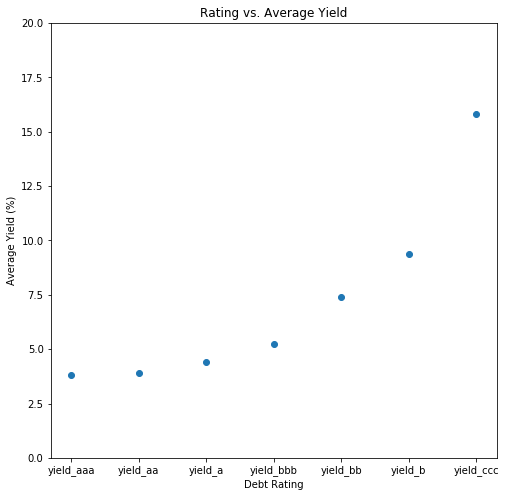

In [106]:
# create a plot_list array containing the column names for each yield
plot_list = ["yield_aaa", "yield_aa", "yield_a", "yield_bbb", "yield_bb", "yield_b", "yield_ccc"]

# print mean for each yield
print("Mean for each yield")
for debt_yield in plot_list:
    print(debt_yield +": {:.2f}".format(daily_merged[debt_yield].mean()))

print("\n")

# print standard deviaqtion for each yield
print("Standard deviation for each yield")
for debt_yield in plot_list:
    print(debt_yield +": {:.2f}".format(daily_merged[debt_yield].std()))
    
# plot mean yield for each rating debt
avg_yield = []

# fill avg_yield with mean yield
for debt_yield in plot_list:
    avg_yield.append(daily_merged[debt_yield].mean())

# plot the average yields
plt.figure(figsize=(8,8))
plt.scatter(plot_list, avg_yield)
plt.xlabel("Debt Rating")
plt.ylabel("Average Yield (%)")
plt.title("Rating vs. Average Yield")
plt.ylim(ymin=0, ymax=20)
plt.show()

## Part 1: EFFR vs. Yield ##

The correlations between the level of effr and yield for each debt rating shows that there is generally a weak positive correlation between effr and yields on debt. This observation is further supplanted by the scatter plot below. For instance, the yields on ccc & lower debt seem to be higher when the effr is the lowest and highest.

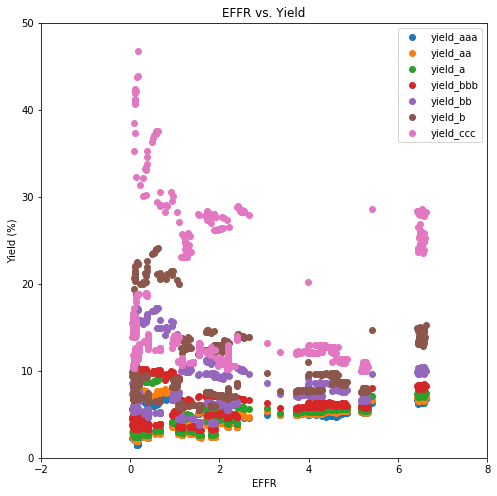

Yield: yield_aaa
Slope: 0.54
Intercept: 2.89
Correlation: 0.74
Spearman Correlation: 0.72
r^2 Score: 0.55 

Yield: yield_aa
Slope: 0.54
Intercept: 2.97
Correlation: 0.69
Spearman Correlation: 0.63
r^2 Score: 0.47 

Yield: yield_a
Slope: 0.48
Intercept: 3.58
Correlation: 0.55
Spearman Correlation: 0.58
r^2 Score: 0.30 

Yield: yield_bbb
Slope: 0.41
Intercept: 4.53
Correlation: 0.46
Spearman Correlation: 0.49
r^2 Score: 0.21 

Yield: yield_bb
Slope: 0.18
Intercept: 7.10
Correlation: 0.13
Spearman Correlation: 0.19
r^2 Score: 0.02 

Yield: yield_b
Slope: 0.20
Intercept: 9.04
Correlation: 0.10
Spearman Correlation: 0.11
r^2 Score: 0.01 

Yield: yield_ccc
Slope: 0.29
Intercept: 15.31
Correlation: 0.08
Spearman Correlation: -0.04
r^2 Score: 0.01 



In [107]:
# create a numpy effr array
effr = np.array(daily_merged["effr"])

# display yields on one scatterplot
plt.figure(figsize=(8,8))
for num in range(len(plot_list)):
    plt.scatter(effr, daily_merged[plot_list[num]], label=plot_list[num])
    plt.xlabel("EFFR")
    plt.ylabel("Yield (%)")
    plt.title("EFFR vs. Yield")
    plt.xlim(xmin=-2, xmax=8)
    plt.ylim(ymin=0, ymax=50)
    plt.legend()
plt.show()

# run sicpr for each yield
for num in range(len(plot_list)):
    print("Yield: "+plot_list[num])
    sicpr = calc_sicpr(effr, np.array(daily_merged[plot_list[num]]))
    print("Slope:", "{:.2f}".format(sicpr[0]))
    print("Intercept:", "{:.2f}".format(sicpr[1]))
    print("Correlation:", "{:.2f}".format(sicpr[2]))
    print("Spearman Correlation:", "{:.2f}".format(sicpr[3]))
    print("r^2 Score:", "{:.2f}".format(sicpr[4]), "\n")

## Part 2: VIX vs. Yield ##

The linear regression output show that positive linear correlation between VIX and yield increases as debt rating decreases. What this observation implies is that investors can look at the level of VIX to predict where the yield on speculative grade (bb, b, ccc & lower) could be. It is interesting to note that the correlation for ccc & lower debt is lower than that of b rated debt. This observation might stem from the fact that ccc & lower includes debt that are rated cc, c, and d in addition to ccc. If the yield for ccc & lower was instead segmented into each rating ccc, cc, c, and d, the below scatter plot could have shown more steady increase in linear relationship as ratings decreased. What this means in real life is that during times of additional market volatility and uncertainty, investors are not too worried about receiving repayments from investment grade debt. However, investors who bought speculative grade debt may be more worried that the issuers of the debt might default on their repayment obligation.

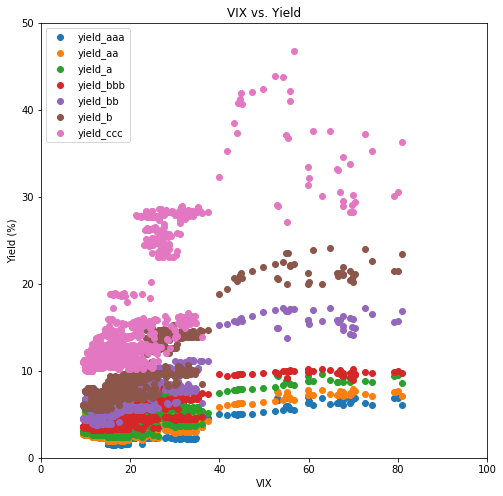

Yield: yield_aaa
Slope: 0.05
Intercept: 2.69
Correlation: 0.44
Spearman Correlation: 0.21
r^2 Score: 0.19 

Yield: yield_aa
Slope: 0.08
Intercept: 2.34
Correlation: 0.57
Spearman Correlation: 0.40
r^2 Score: 0.32 

Yield: yield_a
Slope: 0.10
Intercept: 2.32
Correlation: 0.69
Spearman Correlation: 0.46
r^2 Score: 0.47 

Yield: yield_bbb
Slope: 0.11
Intercept: 2.96
Correlation: 0.73
Spearman Correlation: 0.55
r^2 Score: 0.53 

Yield: yield_bb
Slope: 0.20
Intercept: 3.17
Correlation: 0.87
Spearman Correlation: 0.75
r^2 Score: 0.76 

Yield: yield_b
Slope: 0.29
Intercept: 3.31
Correlation: 0.90
Spearman Correlation: 0.82
r^2 Score: 0.81 

Yield: yield_ccc
Slope: 0.49
Intercept: 5.63
Correlation: 0.79
Spearman Correlation: 0.76
r^2 Score: 0.63 



In [108]:
# create a numpy vix array
vix = np.array(daily_merged["vix"])

# display yields on one scatterplot
plt.figure(figsize=(8,8))
for num in range(len(plot_list)):
    plt.scatter(vix, daily_merged[plot_list[num]], label=plot_list[num])
    plt.xlabel("VIX")
    plt.ylabel("Yield (%)")
    plt.title("VIX vs. Yield")
    plt.xlim(xmin=0, xmax=100)
    plt.ylim(ymin=0, ymax=50)
    plt.legend()
plt.show()

# run sicpr for each yield
for num in range(len(plot_list)):
    print("Yield: "+plot_list[num])
    sicpr = calc_sicpr(vix, np.array(daily_merged[plot_list[num]]))
    print("Slope:", "{:.2f}".format(sicpr[0]))
    print("Intercept:", "{:.2f}".format(sicpr[1]))
    print("Correlation:", "{:.2f}".format(sicpr[2]))
    print("Spearman Correlation:", "{:.2f}".format(sicpr[3]))
    print("r^2 Score:", "{:.2f}".format(sicpr[4]), "\n")

## Part 3: Leverage (Debt / Book Value of Equity) vs. Yield ##

Interestingly, in sharp contrast to Part 2, positive linear relationship between leverage and yield was lower for speculative grade debt. This trend might stem from the fact that in a financial market with high leverage, investors are likely to over sell their positions in speculative debt, leading to an exponential rise in speculative debt yield. Nevertheless, we can expect public debt to trade at greater discounts, some even at distressed levels, when there is more leverage (debt) in the financial system. 

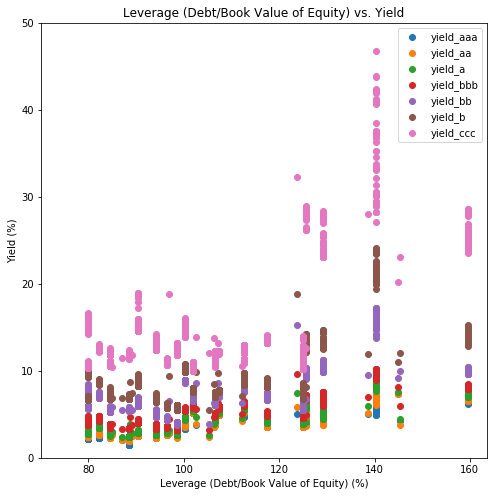

Yield: yield_aaa
Slope: 0.06
Intercept: -2.09
Correlation: 0.85
Spearman Correlation: 0.84
r^2 Score: 0.71 

Yield: yield_aa
Slope: 0.06
Intercept: -2.23
Correlation: 0.82
Spearman Correlation: 0.79
r^2 Score: 0.67 

Yield: yield_a
Slope: 0.06
Intercept: -2.30
Correlation: 0.80
Spearman Correlation: 0.79
r^2 Score: 0.65 

Yield: yield_bbb
Slope: 0.07
Intercept: -1.72
Correlation: 0.82
Spearman Correlation: 0.78
r^2 Score: 0.67 

Yield: yield_bb
Slope: 0.08
Intercept: -1.33
Correlation: 0.65
Spearman Correlation: 0.59
r^2 Score: 0.43 

Yield: yield_b
Slope: 0.12
Intercept: -3.27
Correlation: 0.69
Spearman Correlation: 0.56
r^2 Score: 0.47 

Yield: yield_ccc
Slope: 0.23
Intercept: -8.92
Correlation: 0.70
Spearman Correlation: 0.47
r^2 Score: 0.49 



In [109]:
# create a numpy leverage array
leverage = np.array(daily_merged["LEV"]) * np.array(daily_merged["P/B"])

# display yields on one scatterplot
plt.figure(figsize=(8,8))
for num in range(len(plot_list)):
    plt.scatter(leverage, daily_merged[plot_list[num]], label=plot_list[num])
    plt.xlabel("Leverage (Debt/Book Value of Equity) (%)")
    plt.ylabel("Yield (%)")
    plt.title("Leverage (Debt/Book Value of Equity) vs. Yield")
    plt.xlim(xmin=70)
    plt.ylim(ymin=0, ymax=50)
    plt.legend()
plt.show()

# run sicpr for each yield
for num in range(len(plot_list)):
    print("Yield: "+plot_list[num])
    sicpr = calc_sicpr(leverage, np.array(daily_merged[plot_list[num]]))
    print("Slope:", "{:.2f}".format(sicpr[0]))
    print("Intercept:", "{:.2f}".format(sicpr[1]))
    print("Correlation:", "{:.2f}".format(sicpr[2]))
    print("Spearman Correlation:", "{:.2f}".format(sicpr[3]))
    print("r^2 Score:", "{:.2f}".format(sicpr[4]), "\n")

# V. Evaluation of Significance #

**Hypothesis**

- From looking at the observations for vix and leverage, I hypothesized that the rate at which yield changes for ccc & lower debt in relations to increase in vix and leverage is positive and strong. This rate of change is measured by the slopes of the linear regressions: 0.49 for vix and 0.23 for leverage. I chose to make hypothesis only for ccc & lower since this area of the speculative market is generally regarded as being the most volatile and risky in the debt market.  

In [110]:
def permuted_y():
    return np.random.permutation(daily_merged["yield_ccc"].copy())

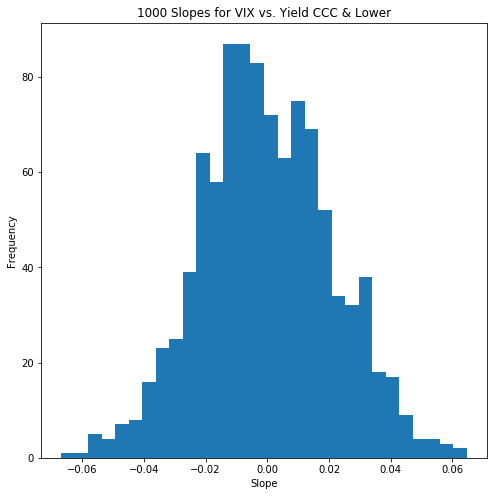

In [111]:
# calculate 1000 new slopes using permuted yield_ccc
permuted_slope_vix = np.zeros(1000)

for x in range(len(permuted_slope)):
    permuted_slope_vix[x] = LinearRegression().fit(daily_merged[["vix"]], permuted_y().reshape(-1,1)).coef_[0][0]
    
# plot histogram for permuted y
plt.figure(figsize=(8,8))
plt.hist(permuted_slope_vix, bins = 30)
plt.title("1000 Slopes for VIX vs. Yield CCC & Lower")
plt.xlabel("Slope")
plt.ylabel("Frequency")
plt.show()

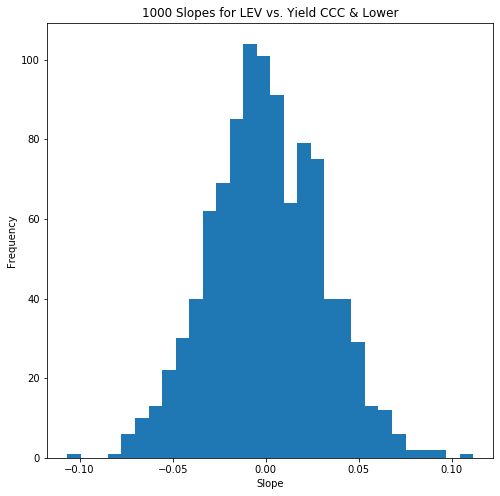

In [112]:
# calculate 1000 new slopes using permuted yield_ccc
permuted_slope_lev = np.zeros(1000)

for x in range(len(permuted_slope)):
    permuted_slope_lev[x] = LinearRegression().fit(daily_merged[["LEV"]], permuted_y().reshape(-1,1)).coef_[0][0]
    
# plot histogram for permuted y
plt.figure(figsize=(8,8))
plt.hist(permuted_slope_lev, bins = 30)
plt.title("1000 Slopes for LEV vs. Yield CCC & Lower")
plt.xlabel("Slope")
plt.ylabel("Frequency")
plt.show()

**Evaluation of Significance**

- Above histogram shows that slope of 0.49 for the linear regression of vix and yield_ccc is very unlikely to be from a random chance. When we look at the histogram for 1,000 permuted yield_ccc's, we can see that the slopes are approximately within the range of -0.06 and 0.07, and there are acutally no circumstances where the slope is anywhere near 0.49. Therefore we can assume that the slope of 0.49 from vix vs. yield_ccc dataset is statistically significant.
- Similarly, the histogram for leverage and yield_ccc show that the actual slope of 0.23 is statistically significant. The slopes of 1,000 permuted yield_ccc's in relation to leverage are within the range of -0.1 and 0.1. Nowhere can be found a slope near 0.23.  

# VI. Conclusion #

**Effective Federal Funds Rate & Yield**

- As displayed in the Data Analysis section, the level of effective federal funds rate does not seem to have strong linear relationship with the level of price (higher yield means lower price). What the results in the Data Analysis section implies is that regardless of whether the federal funds rate is low or high at a given date, there are opportunities to find attractive debt investments.

**CBOE Volatility Index & Yield**

- The results from VIX vs. Yield section reveal that for speculative grade debt investments (bb, b, ccc rated debt), a higher vix at a given moment could serve to remind debt investors that there are a lot of speculative grade debt that are trading at bargain prices. Of course, when investors shop for these bargain deals, they should acknowledge the fact that the low prices explicitly imply higher likelihoods of the debt issuers defaulting on their repayment obligations, and their investments could become worthless. The speculative debt (bb, b, ccc) had strong linear relationships with vix, as displayed by their correlation and spearman correlation that were all north of 0.75. The scatterplot shows that there were high concentration of data where vix was south of 40. What this implies is that markets are typically not too volatile. It is also very interesting to note that the slope of the linear model for bb, b, ccc rated debt dramatically increases as vix increases (0.20, 0.29, 0.49) in a stark contrast to the investment grade debt rated aaa, aa, a, bbb (0.05, 0.08, 0.10, 0.11). What these metrics imply is that in volatile markets, which usually result from investors’ fear stemming from uncertainty, investors are much more likely to sell, out of fear, speculative grade debt investments than they would with investment grade debt investments. From an investor’s point of view, a wide-spread sell off resulting from fear and volatility in the markets could be understood as inefficiencies and irrationalities in pricing of these investment opportunities. With enough due diligence on these highly discounted investments, investors could find real bargains. ViX peaked at around 80 on March 16, 2020 and as of May 16, 2020 sits around 32.

**Leverage (Debt/Book Value of Equity) & Yield**

- The results for Leverage vs. Yield section reveals that when there is a lot of leverage in the financial system (the amount of debt companies have taken on in relation to the value of their book equity), investors are more likely to be able to find corporate debt that are trading at discounts. Interestingly, correlations between the amount of leverage and the yield on investment grade debt were much stronger than the correlation between the amount of leverage and the yield on speculative grade debt. A possible interpretation of this contrast is that given a certain amount of leverage in the financial system, investors are much more likely to sell off their speculative grade debt investments out of fear. The less linear relationship observed for speculative grade debt investments imply that when the level of leverage in the financial system is high, investors are much more likely to find mispriced debt investment opportunities in the speculative market with debt rated bb, b, ccc.

# VII. Source Code #

**GIT Hub Repository**
- https://github.com/dwc244/INFO2950_FinalProject_DanChung

# VIII. Acknowledgements #

I thank my project sponsor Alexandra Champagne for reviewing my work and providing me with feedback via Zoom during finals week. Also, the inspiration for this project came from the impact of COVID-19 on our real economy and the debt markets. At every moment of financial market uncertainty resulting from special situations, there are people working in the front lines to mitigate the impact of negative disruption on our real economcy and the financial markets. A study like this wouldn't have been possible without the work of monetary and fiscal policy makers, and the doctors today who are working to restore stability and health to our world.